In [1]:
import imageio.v2 as imio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import cv2
from skimage.color import rgb2lab, deltaE_cie76
import os
from numpy import sqrt
import math
import itertools

# Python - Colour Proportion Extraction with Hex Labels

Upload a picture to extract the colour proportions. This tool outputs results with all

# Read Images

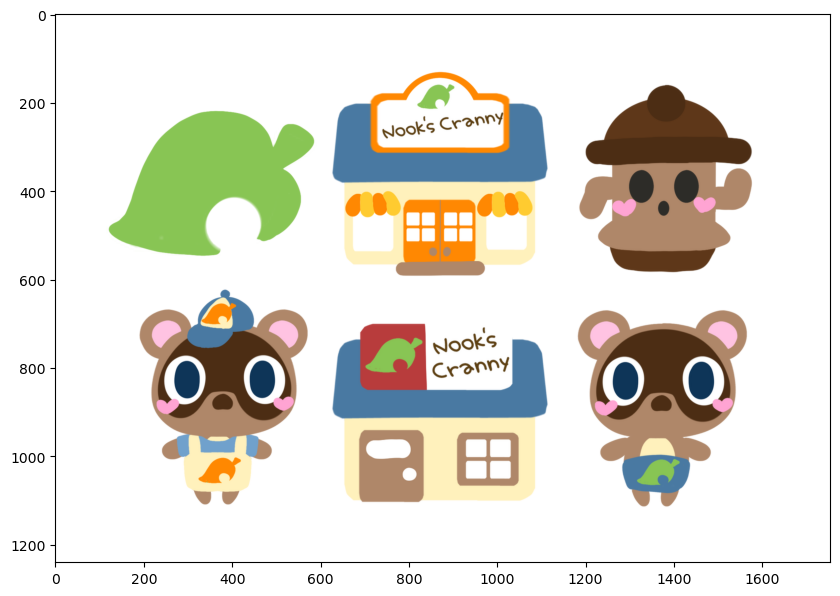

In [2]:
img = imio.imread('timtom.png')
plt.figure(figsize=(10,10))
plt.imshow(img)

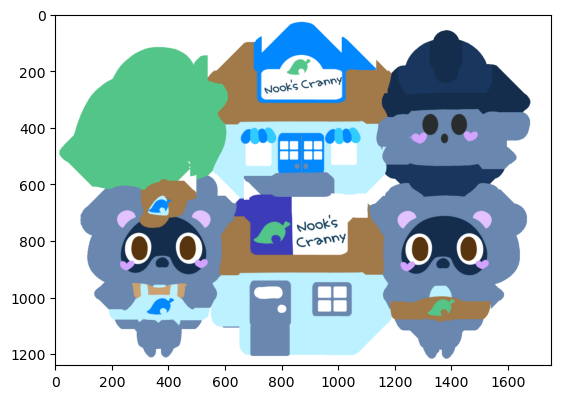

In [3]:
img2 = img.copy
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

# Preprocess Details of Image

In [4]:
print("Shape of image:")
img.shape

Shape of image:


(1240, 1754, 4)

In [5]:
print ("Min RGB Values:", img.min())
print ("Max RGB Values:", img.max())

Min RGB Values: 0
Max RGB Values: 255


In [6]:
print("Values of a channel at a pixel:")
img[400,400,1]

Values of a channel at a pixel:


197

Show a visual of a specific channel:


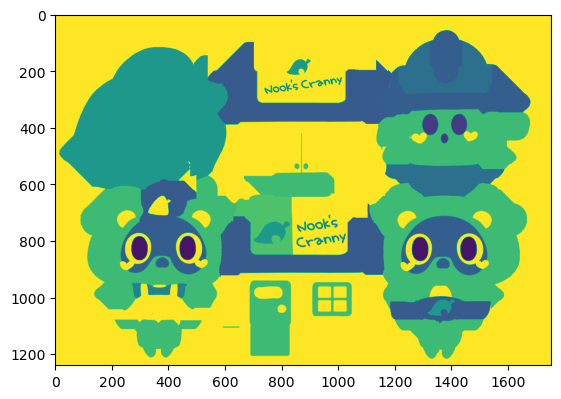

In [7]:
print("Show a visual of a specific channel:")
plt.imshow(img[:,:,0]) # green
plt.show()

        print("colour: ", colour)
        print("compare: ", compare)
        print(" difference:", colour_diff)

In [238]:
def get_colours(image, number_of_colours, min_threshold, show_chart):
    reshaped_image = cv2.resize(image, (600,400))
    reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], reshaped_image.shape[2])
    
    # initialize model
    clf = KMeans(n_clusters = number_of_colours)
    
    # fit the model
    labels = clf.fit_predict(reshaped_image)
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    counts_percentage = {key: value / (sum(counts.values())) for key, value in counts.items()}
    
    # get cluster centers
    center_colours = clf.cluster_centers_
    
    # store cluster centers in array
    ordered_colours = [center_colours[i] for i in counts.keys()]
    
    colour_dic = {}
    index = 0
    for key,value in counts.items():
        colour_dic[key] = [value, ordered_colours[index]]
        index += 1
    
    grouped_colour_dic = {}
    # for each colour in the array, compare distance of colour to other colours      
    for key1, key2 in itertools.combinations(colour_dic.keys(),2):
        colour_diff = sqrt(
                (abs(colour_dic[key1][1][0] - colour_dic[key2][1][0])**2) +
                (abs(colour_dic[key1][1][1] - colour_dic[key2][1][1])**2) +
                (abs(colour_dic[key1][1][2] - colour_dic[key2][1][2])**2))
        if colour_diff < min_threshold:
            sum_key_1 = sqrt(abs(colour_dic[key1][1][0])**2 +
                             abs(colour_dic[key1][1][1])**2 +
                             abs(colour_dic[key1][1][2])**2
                            )
            sum_key_2 = sqrt(abs(colour_dic[key2][1][0])**2 +
                             abs(colour_dic[key2][1][1])**2 +
                             abs(colour_dic[key2][1][2])**2
                            )
            if sum_key_1 >= sum_key_2:
                grouped_colour_dic[key1] = colour_dic[key1]
            else:
                grouped_colour_dic[key2] = colour_dic[key2]
    
    hex_colours = []
    colour_proportions = []
    for key, value in grouped_colour_dic.items():
        hex_colours.append("#{:02x}{:02x}{:02x}".format(int(value[1][0]), int(value[1][1]), int(value[1][2])))
        colour_proportions.append(value[0])
        
    if (show_chart):
        plt.figure(figsize = (8,6))
        # plot a pie with colour values, hex labels, and display their colours
        plt.pie(colour_proportions, labels = hex_colours, colors = hex_colours, autopct='%1.1f%%')
        
    return colour_proportions, hex_colours

In [234]:
proportions, hex = get_colours(img,15,50, False)

In [239]:
def get_colours_all(image, number_of_colours, show_chart):
    reshaped_image = cv2.resize(image, (600,400))
    reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], reshaped_image.shape[2])
    
    # initialize model
    clf = KMeans(n_clusters = number_of_colours)
    
    # fit the model
    labels = clf.fit_predict(reshaped_image)
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    counts_percentage = {key: value / (sum(counts.values())) for key, value in counts.items()}
    
    # get cluster centers
    center_colours = clf.cluster_centers_
    
    # store cluster centers in array
    ordered_colours = [center_colours[i] for i in counts.keys()]
    
    # convert values in cluster centers to hex
    hex_colours = []
    for rgb in ordered_colours:
        hex_colours.append("#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2])))
    
    # get rgb colours in each cluster center
    rgb_colours = [ordered_colours[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8,6))
        # plot a pie with colour values, hex labels, and display their colours
        plt.pie(counts.values(), labels = hex_colours, colors = hex_colours, autopct='%1.1f%%')
        
    return counts.values(), hex_colours

In [240]:
proportions_all, hex_all = get_colours_all(img,15, False)

#  Plot Results

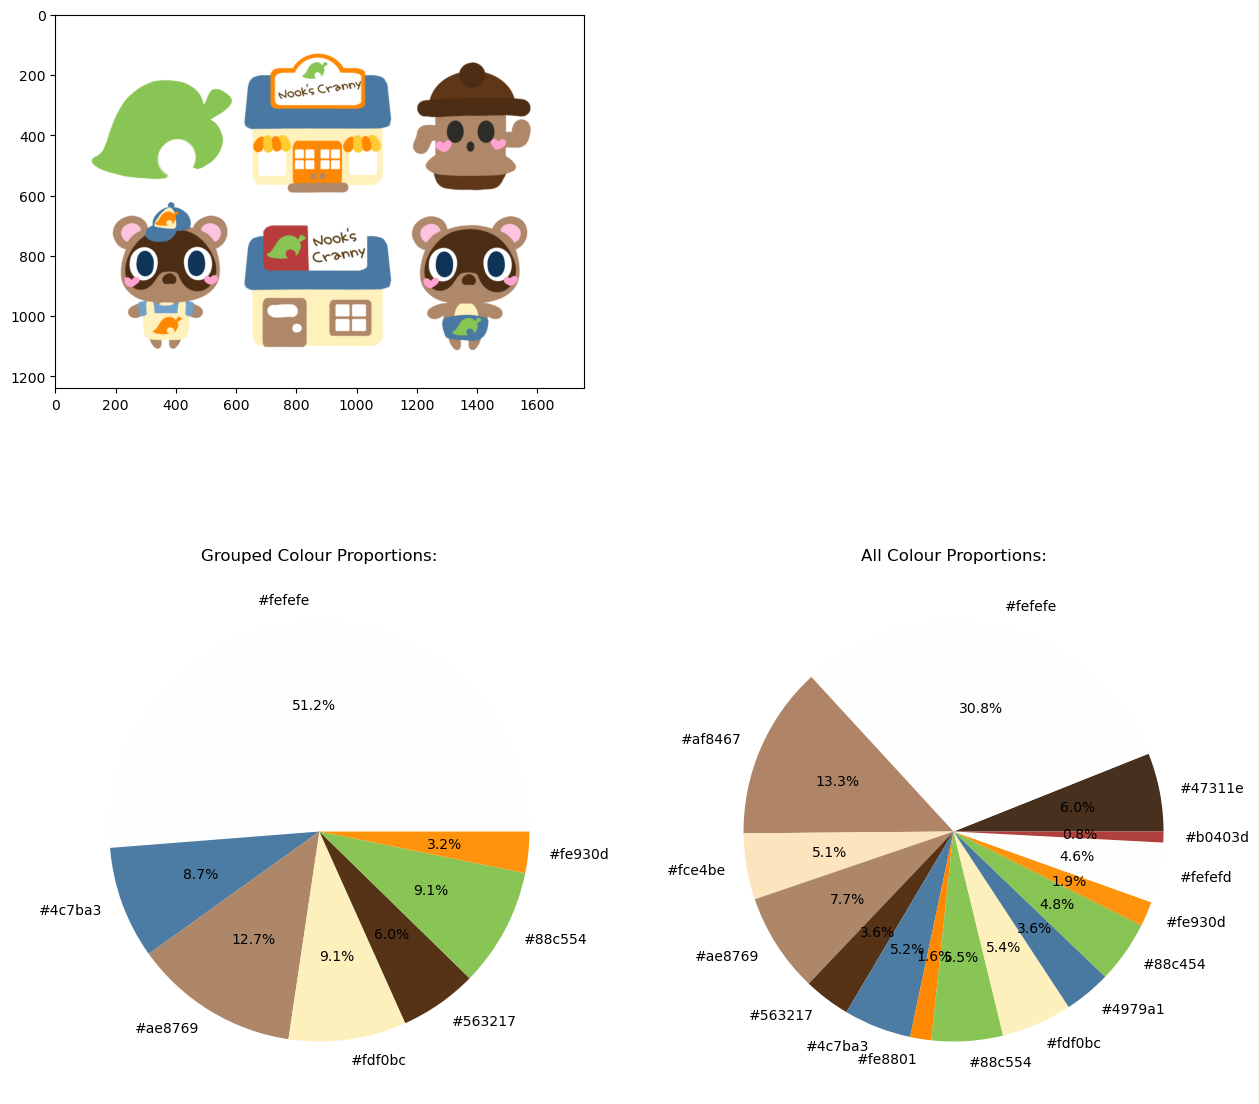

In [251]:
fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(221)
ax0.imshow(img)

ax1 = fig.add_subplot(223)
ax1.pie(proportions, labels = hex, colors = hex, autopct='%1.1f%%');
ax1.set_title("Grouped Colour Proportions:")


ax2 = fig.add_subplot(224)
ax2.pie(proportions_all, labels = hex_all, colors = hex_all, autopct='%1.1f%%');
ax2.set_title("All Colour Proportions:")

plt.show()
